In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from gensim.models import word2vec
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from zipfile import ZipFile

In [ ]:
data = ZipFile('/content/drive/MyDrive/IMDB Dataset.csv.zip')

In [ ]:
data.extractall()

In [ ]:
data = pd.read_csv('IMDB Dataset.csv')

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:

data.shape

(50000, 2)

In [ ]:
x_train = data['review'].values
y_train = data['sentiment'].values

In [ ]:
x_train

array(["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to

In [ ]:
y_train = [0 if x == "positive" else 1 for x in y_train]

In [ ]:
y_train

In [ ]:
import re
def clean_text(text):
  if type(text)!=str:
    return str(text)
  return re.sub(r'[^0-9A-Za-z" "]','',text)

In [ ]:
x_train = [clean_text(here) for here in x_train]
save =[]
for each_sentence in x_train:
  save.append(each_sentence.split(" "))
    

In [ ]:
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(x_train)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'in': 7,
 'it': 8,
 'i': 9,
 'this': 10,
 'that': 11,
 'br': 12,
 'was': 13,
 'as': 14,
 'with': 15,
 'for': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'be': 26,
 'he': 27,
 'one': 28,
 'its': 29,
 'at': 30,
 'all': 31,
 'by': 32,
 'an': 33,
 'they': 34,
 'from': 35,
 'who': 36,
 'so': 37,
 'like': 38,
 'or': 39,
 'just': 40,
 'her': 41,
 'about': 42,
 'if': 43,
 'has': 44,
 'out': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'when': 50,
 'more': 51,
 'very': 52,
 'my': 53,
 'even': 54,
 'no': 55,
 'up': 56,
 'would': 57,
 'she': 58,
 'time': 59,
 'only': 60,
 'which': 61,
 'really': 62,
 'their': 63,
 'see': 64,
 'were': 65,
 'story': 66,
 'had': 67,
 'can': 68,
 'me': 69,
 'than': 70,
 'we': 71,
 'much': 72,
 'well': 73,
 'been': 74,
 'get': 75,
 'will': 76,
 'other': 77,
 'do': 78,
 'great': 79,
 'also': 80,
 'into': 81,
 'bad': 82,
 'be

In [ ]:
x_train = tokenizer.texts_to_sequences(x_train)

In [ ]:
max_len = max(len(sentences) for sentences in x_train)

In [ ]:
x_train = pad_sequences(x_train,maxlen=100)

In [ ]:
len(x_train[0])

100

In [ ]:
wordvec = word2vec.Word2Vec(save)

In [ ]:
from collections import defaultdict
def create_word_embedding(wordvec,word_index):
  word_embedding = defaultdict()
  for x,y in word_index.items():
    
    try:
      word_embedding[y] = np.array(wordvec[x])
    except:
      word_embedding[y] = np.random.rand(100)
    
  return word_embedding


In [ ]:
word_embedding = create_word_embedding(wordvec,word_index)
word_embedding[0] = np.random.rand(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [ ]:
x_train = [[word_embedding[x] for x in here] for here in x_train]

In [ ]:
len(x_train)

50000

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2)

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.layers.Conv1D(kernel_size=3,input_shape = (100,100),filters = 32))

In [ ]:
model.add(keras.layers.Flatten())

In [ ]:
model.add(keras.layers.Dense(256, activation = 'relu'))

In [ ]:
model.add(keras.layers.Dense(128, activation = 'relu'))

In [ ]:
model.add(keras.layers.Dense(2, activation = 'relu'))

In [ ]:
model.add(keras.layers.Dense(1,activation='relu'))

In [ ]:
model.compile(loss = keras.losses.binary_crossentropy,optimizer = 'adam',metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 98, 32)            9632      
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 256)               803072    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 845,861
Trainable params: 845,861
Non-trai

In [ ]:
x_train = np.array(x_train) 
x_test = np.array(x_test) 

In [ ]:
print(x_train.shape,x_test.shape)

(40000, 100, 100) (10000, 100, 100)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 100, 100,1)
x_test = x_test.reshape(x_test.shape[0], 100 , 100 ,1)

In [ ]:
x_train.shape

(40000, 100, 100, 1)

In [ ]:
x_test.shape

(10000, 100, 100, 1)

In [ ]:
y_train = np.array(y_train) * 1000
y_test = np.array(y_test) * 1000

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
model.fit(x_train,y_train,epochs=2,batch_size=20,validation_data=(x_test,y_test))

Epoch 1/2
2000/2000 [==============================] - 20s 4ms/step - loss: -7578.4878 - acc: 2.2500e-04 - val_loss: -7722.2144 - val_acc: 0.0000e+00
Epoch 2/2
2000/2000 [==============================] - 8s 4ms/step - loss: -7581.1895 - acc: 0.0000e+00 - val_loss: -7722.2144 - val_acc: 0.0000e+00


In [ ]:
from sklearn import svm

In [ ]:
model.pop()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 98, 32)            9632      
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 256)               803072    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 845,858
Trainable params: 845,858
Non-trainable params: 0
_________________________________________________________________


In [ ]:
feature_extraction = model(x_train) 

In [ ]:
feature_extraction

<tf.Tensor: shape=(40000, 2), dtype=float32, numpy=
array([[1629296.5,       0. ],
       [1635287.6,       0. ],
       [1840569.6,       0. ],
       ...,
       [1840619.2,       0. ],
       [2006196.2,       0. ],
       [ 992940.3,       0. ]], dtype=float32)>

In [ ]:
model = svm.SVC()

In [ ]:
feature_extraction = feature_extraction * 100000

In [ ]:
model.fit(feature_extraction, y_train)

SVC()

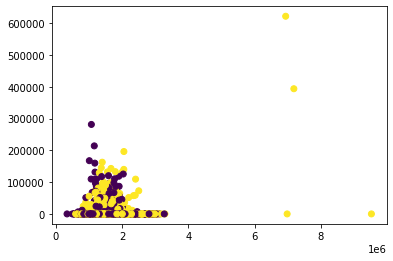

In [ ]:
plt.scatter(feature_extraction[:,0],feature_extraction[:,1], c = y_train)